# Introduction


Hi I'm lacakp : )
github: https://github.com/lacakp

- Classification Apple Banana and Tomato

- Transfer Learning Using Keras -- MobileNetv2 :
Efficient Convolutional Neural Networks for Mobile Vision Applications

- Transfer Learning คือ เทคนิคที่ช่วยลดเวลาการเทรนโมเดล Deep Learning ด้วยการนำบางส่วนของโมเดลที่เทรนเรียบร้อยแล้ว กับงานที่ใกล้เคียงกัน มาใช้เป็นส่วนหนึ่งของโมเดลใหม่

- MobileNet คืออะไร : Keng Surapong 2020-01-12 
- https://www.bualabs.com/archives/3439/tensorflow-js-tutorial-build-image-classification-javascript-mobilenet-pretrained-model-tfjs-ep-7/
- Transfer Learning คืออะไร : Keng Surapong 2020-01-14
- https://www.bualabs.com/archives/3493/what-is-transfer-learning-build-headless-mobilenet-model-transfer-learning-machine-learning-mobilenet-json-retrain-webcam-tensorflow-js-tfjs-ep-10/
- Neural Network Programming : โดย ชิตพงษ์ กิตตินราดร | มกราคม 2563
- https://guopai.github.io/ml-blog15.html
- 3 วิธีในการสร้างโมเดล Machine Learning ด้วย Keras และ TensorFlow 2.0 : ICHI.PRO
- https://ichi.pro/th/3-withi-ni-kar-srang-model-machine-learning-dwy-keras-laea-tensorflow-2-0-244131078796499

#Pipeline
1. Data Acquisition
2. Training The Model
3. Evaluation
4. Prediction
5. Deploy Model

## Data Acquisition

### get data

- Fruits 360 : __https://www.kaggle.com/moltean/fruits__ 

- A dataset with 90380 images of 131 fruits and vegetables

- <img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" scale="0">

- This work is licensed under a 
<a rel="license" href="https://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>

__ทำการดาวน์โหลดข้อมูล Dataset และ ทำการ unzip ไฟล์ abt-fruit.zip ที่ดาวน์โหลดมา__

In [1]:
!wget https://codeload.github.com/lacakp/fruit-ds/zip/refs/tags/abt-v1.2
!unzip "/content/abt-v1.2"

Streaming output truncated to the last 5000 lines.
  inflating: fruit-ds-abt-v1.2/train/Banana/Banana/r_146_100.jpg  
  inflating: fruit-ds-abt-v1.2/train/Banana/Banana/r_147_100.jpg  
  inflating: fruit-ds-abt-v1.2/train/Banana/Banana/r_148_100.jpg  
  inflating: fruit-ds-abt-v1.2/train/Banana/Banana/r_149_100.jpg  
  inflating: fruit-ds-abt-v1.2/train/Banana/Banana/r_150_100.jpg  
  inflating: fruit-ds-abt-v1.2/train/Banana/Banana/r_151_100.jpg  
  inflating: fruit-ds-abt-v1.2/train/Banana/Banana/r_152_100.jpg  
  inflating: fruit-ds-abt-v1.2/train/Banana/Banana/r_153_100.jpg  
  inflating: fruit-ds-abt-v1.2/train/Banana/Banana/r_154_100.jpg  
  inflating: fruit-ds-abt-v1.2/train/Banana/Banana/r_155_100.jpg  
  inflating: fruit-ds-abt-v1.2/train/Banana/Banana/r_156_100.jpg  
  inflating: fruit-ds-abt-v1.2/train/Banana/Banana/r_157_100.jpg  
  inflating: fruit-ds-abt-v1.2/train/Banana/Banana/r_158_100.jpg  
  inflating: fruit-ds-abt-v1.2/train/Banana/Banana/r_159_100.jpg  
  inflating

In [2]:
# ย้ายไฟล์
!mv -v "/content/fruit-ds-abt-v1.2/test" "/content/"
!mv -v "/content/fruit-ds-abt-v1.2/train" "/content/"

renamed '/content/fruit-ds-abt-v1.2/test' -> '/content/test'
renamed '/content/fruit-ds-abt-v1.2/train' -> '/content/train'


In [3]:
import shutil
try:
  !rm -rf /content/fruit-ds-abt-v1.2
  !rm -rf /content/abt-v1.2
except:
  pass

## Split - Train data and validation data

- เตรียม library ต่างๆที่จำเป็น ต้องใช้ในการ Train model

In [12]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

- กำหนด shape ของภาพเป็น 224x224


In [13]:
height = 224
width = 224
batch_size = 32
data_dir = '/content/train'

- ดึงข้อมูลจาก path data_dir ซึ่งคือ โฟลเดอร์ Train เพื่อทำการแบ่งเป็น  training set 70 % และ validation set อยู่ 30 %

In [14]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.3,
    subset = 'training',
    seed = 123,
    image_size = (height, width),
    batch_size = batch_size
)

Found 11219 files belonging to 3 classes.
Using 7854 files for training.


- ดึงข้อมูลจาก path data_dir ซึ่งคือ โฟลเดอร์ Train เพื่อทำการแบ่งเป็น validation set

In [15]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.3,
    subset = 'validation',
    seed = 123,
    image_size = (height, width),
    batch_size = batch_size
)

Found 11219 files belonging to 3 classes.
Using 3365 files for validation.


- เช็คดู class_names

In [16]:
classes = train_ds.class_names
print(classes)
print(train_ds)

['Apple', 'Banana', 'Tomato']
<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>


## Training The Model

### MobileNetv2

- Document - MobileNetv2 model
- https://keras.io/api/applications/mobilenet/


- Load Model

In [17]:
from tensorflow.keras.applications import MobileNetV2
model = MobileNetV2(weights = 'imagenet')

14548992/14536120 [==============================] - 0s 0us/step


In [18]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [19]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

### Train
https://keras.rstudio.com/reference/fit.html#arguments

validation_data	
Data on which to evaluate the loss and any model metrics at the end of each epoch. The model will not be trained on this data. This could be a list (x_val, y_val) or a list (x_val, y_val, val_sample_weights). validation_data will override validation_split.


- หมายถึง ข้อมูลการตรวจสอบ ประเมินค่า loss และ model metrics เมื่อจบ epoch


epochs
Number of epochs to train the model. Note that in conjunction with initial_epoch, epochs is to be understood as "final epoch". The model is not trained for a number of iterations given by epochs, but merely until the epoch of index epochs is reached.

- epochs	คือ จำนวนครั้งในการฝึกโมเดล

In [20]:
epochs = 12
ABTFruit = model.fit(train_ds,
                     validation_data=val_ds, 
                     epochs=epochs
                     )

Epoch 1/12


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


246/246 [==============================] - 137s 408ms/step - loss: 0.1099 - accuracy: 0.9812 - val_loss: 13.4363 - val_accuracy: 0.4550
Epoch 2/12
246/246 [==============================] - 101s 408ms/step - loss: 0.0261 - accuracy: 0.9917 - val_loss: 28.4477 - val_accuracy: 0.4285
Epoch 3/12
246/246 [==============================] - 99s 400ms/step - loss: 0.0189 - accuracy: 0.9959 - val_loss: 3.9081 - val_accuracy: 0.6256
Epoch 4/12
246/246 [==============================] - 98s 397ms/step - loss: 0.0077 - accuracy: 0.9977 - val_loss: 34.6454 - val_accuracy: 0.4300
Epoch 5/12
246/246 [==============================] - 101s 410ms/step - loss: 0.0060 - accuracy: 0.9985 - val_loss: 5.7108 - val_accuracy: 0.5403
Epoch 6/12
246/246 [==============================] - 103s 417ms/step - loss: 0.0155 - accuracy: 0.9959 - val_loss: 3.5465 - val_accuracy: 0.8163
Epoch 7/12
246/246 [==============================] - 100s 406ms/step - loss: 0.0350 - accuracy: 0.9892 - val_loss: 11.6703 - val_accu

## Evaluation

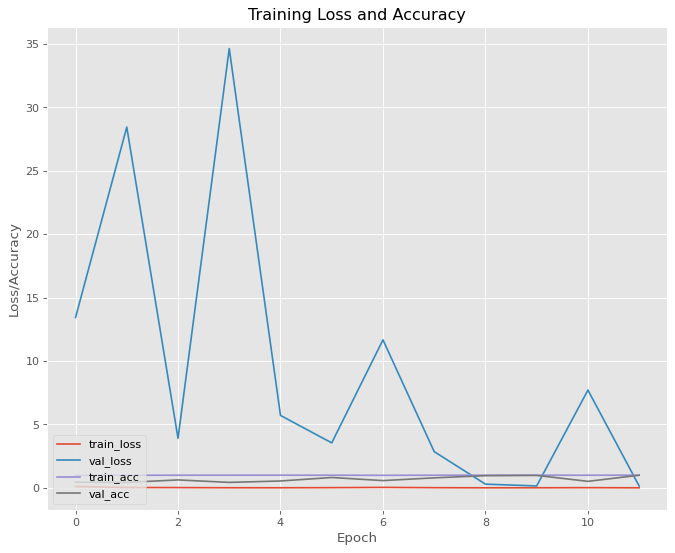

In [23]:
# plot the training loss and accuracy
N = 12
plt.style.use("ggplot")
plt.figure(figsize=(10, 8), dpi=80)

plt.plot(np.arange(0, N), ABTFruit.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), ABTFruit.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), ABTFruit.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), ABTFruit.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
# plt.savefig(args["plot"])

- Evaluation model ทำการพล็อตกราฟดูค่าความถูกต้องและค่าความผิดพลาด acc/loss

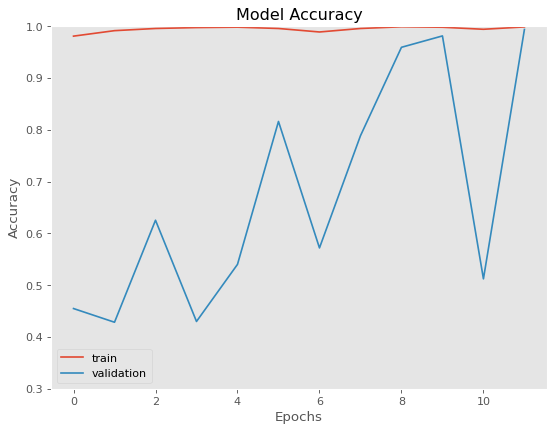

In [25]:
# Model Accuracy
# fig1 = plt.gcf()
plt.figure(figsize=(8, 6), dpi=80)

plt.plot(ABTFruit.history['accuracy'])
plt.plot(ABTFruit.history['val_accuracy'])
plt.axis(ymin=0.3, ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

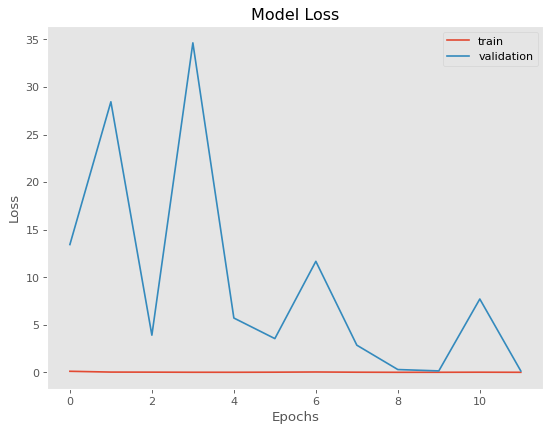

In [26]:
# Model Loss
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(ABTFruit.history['loss'])
plt.plot(ABTFruit.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

## Prediction

- ทำการนำโมลที่เทรนได้มาใช้ มาทำนายจากภาพ โดยใช้การอัพโหลดภาพ

In [27]:
def pred_func(image):
  """
  arg = image
  
  return :
  output_class : result class name
  pred : 
  """
  img = cv2.resize(image, (224, 224), interpolation=cv2.INTER_AREA)
  img = np.expand_dims(img, axis=0)
  # print(img.shape)
  pred = model.predict(img)
  prediction = np.argmax(pred, axis=1)
  print(prediction)
  output_class = np.argmax(pred)
  return output_class, pred

In [28]:
import os
import cv2 as cv
# ฟังก์ชันสำหรับโหลดภาพเข้ามา
def load_images_from_folder(folder):
    images = [] # สร้าง list สำหรับเก็บภาพ 
    for filename in os.listdir(folder): # ลูปดูภาพใน folder 
        img = cv.imread(os.path.join(folder,filename))  # ทำการอ่านภาพจาก ชื่อภาพ โดย cv.imread เก็บไว้ img 
        if img is not None: # เช็คดูว่าถ้าไม่ได้เป็นค่าว่าง 
            images.append(img) # ให้เก็บไว้ใน list images
    return images # คืนค่าเป็น list Images

In [29]:

apple_test = '/content/test/Apple'
banana_test = '/content/test/Banana'
tomato_test = '/content/test/Tomato'

apple_image = load_images_from_folder(apple_test)
banana_image = load_images_from_folder(banana_test)
tomato_image = load_images_from_folder(tomato_test)
print(len(apple_image))
print(len(banana_image))
print(len(tomato_image))

7
8
10


[0]


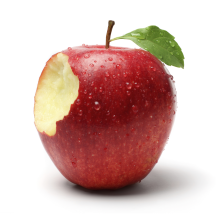

------------------------------------- Apple
[1]


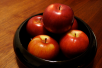

------------------------------------- Banana
[1]


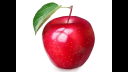

------------------------------------- Banana
[0]


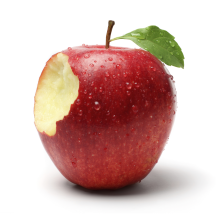

------------------------------------- Apple
[0]


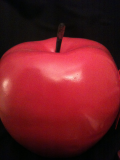

------------------------------------- Apple
[1]


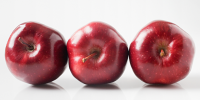

------------------------------------- Banana
[1]


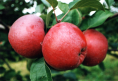

------------------------------------- Banana


In [30]:
import cv2
for img in apple_image:
  scale_percent = 10 # percent of original size
  width = int(img.shape[1] * scale_percent / 100)
  height = int(img.shape[0] * scale_percent / 100)
  dim = (width, height)
  # resize image
  resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)



  output, pred = pred_func(resized)

  cv2_imshow(resized)
  print("-------------------------------------", classes[np.argmax(pred)])

[1]


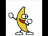

------------------------------------- Banana
[1]


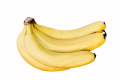

------------------------------------- Banana
[1]


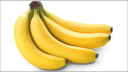

------------------------------------- Banana
[1]


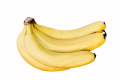

------------------------------------- Banana
[1]


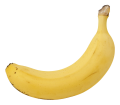

------------------------------------- Banana
[1]


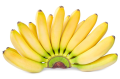

------------------------------------- Banana
[1]


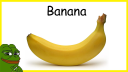

------------------------------------- Banana
[1]


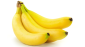

------------------------------------- Banana


In [31]:
for img in banana_image:
  scale_percent = 10 # percent of original size
  width = int(img.shape[1] * scale_percent / 100)
  height = int(img.shape[0] * scale_percent / 100)
  dim = (width, height)
  # resize image
  resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

  output, pred = pred_func(img)

  cv2_imshow(resized)
  print("-------------------------------------", classes[np.argmax(pred)])

[1]


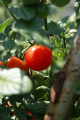

------------------------------------- Banana
[1]


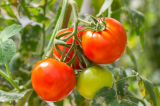

------------------------------------- Banana
[1]


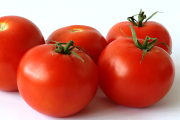

------------------------------------- Banana
[2]


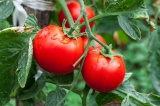

------------------------------------- Tomato
[1]


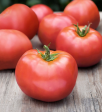

------------------------------------- Banana
[1]


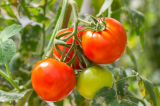

------------------------------------- Banana
[1]


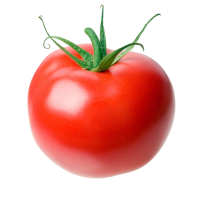

------------------------------------- Banana
[1]


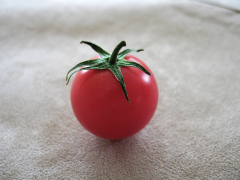

------------------------------------- Banana
[2]


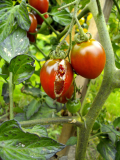

------------------------------------- Tomato
[1]


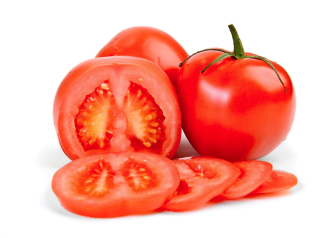

------------------------------------- Banana


In [35]:
for img in tomato_image:
  scale_percent = 10 # percent of original size
  width = int(img.shape[1] * scale_percent / 100)
  height = int(img.shape[0] * scale_percent / 100)
  dim = (width, height)
  # resize image
  resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

  output, pred = pred_func(img)

  cv2_imshow(resized)
  print("-------------------------------------", classes[np.argmax(pred)])

Saving download (1).jfif to download (1).jfif
dict_keys(['download (1).jfif'])
ภาพที่อัพโหลดขึ้นมาคือ download (1).jfif


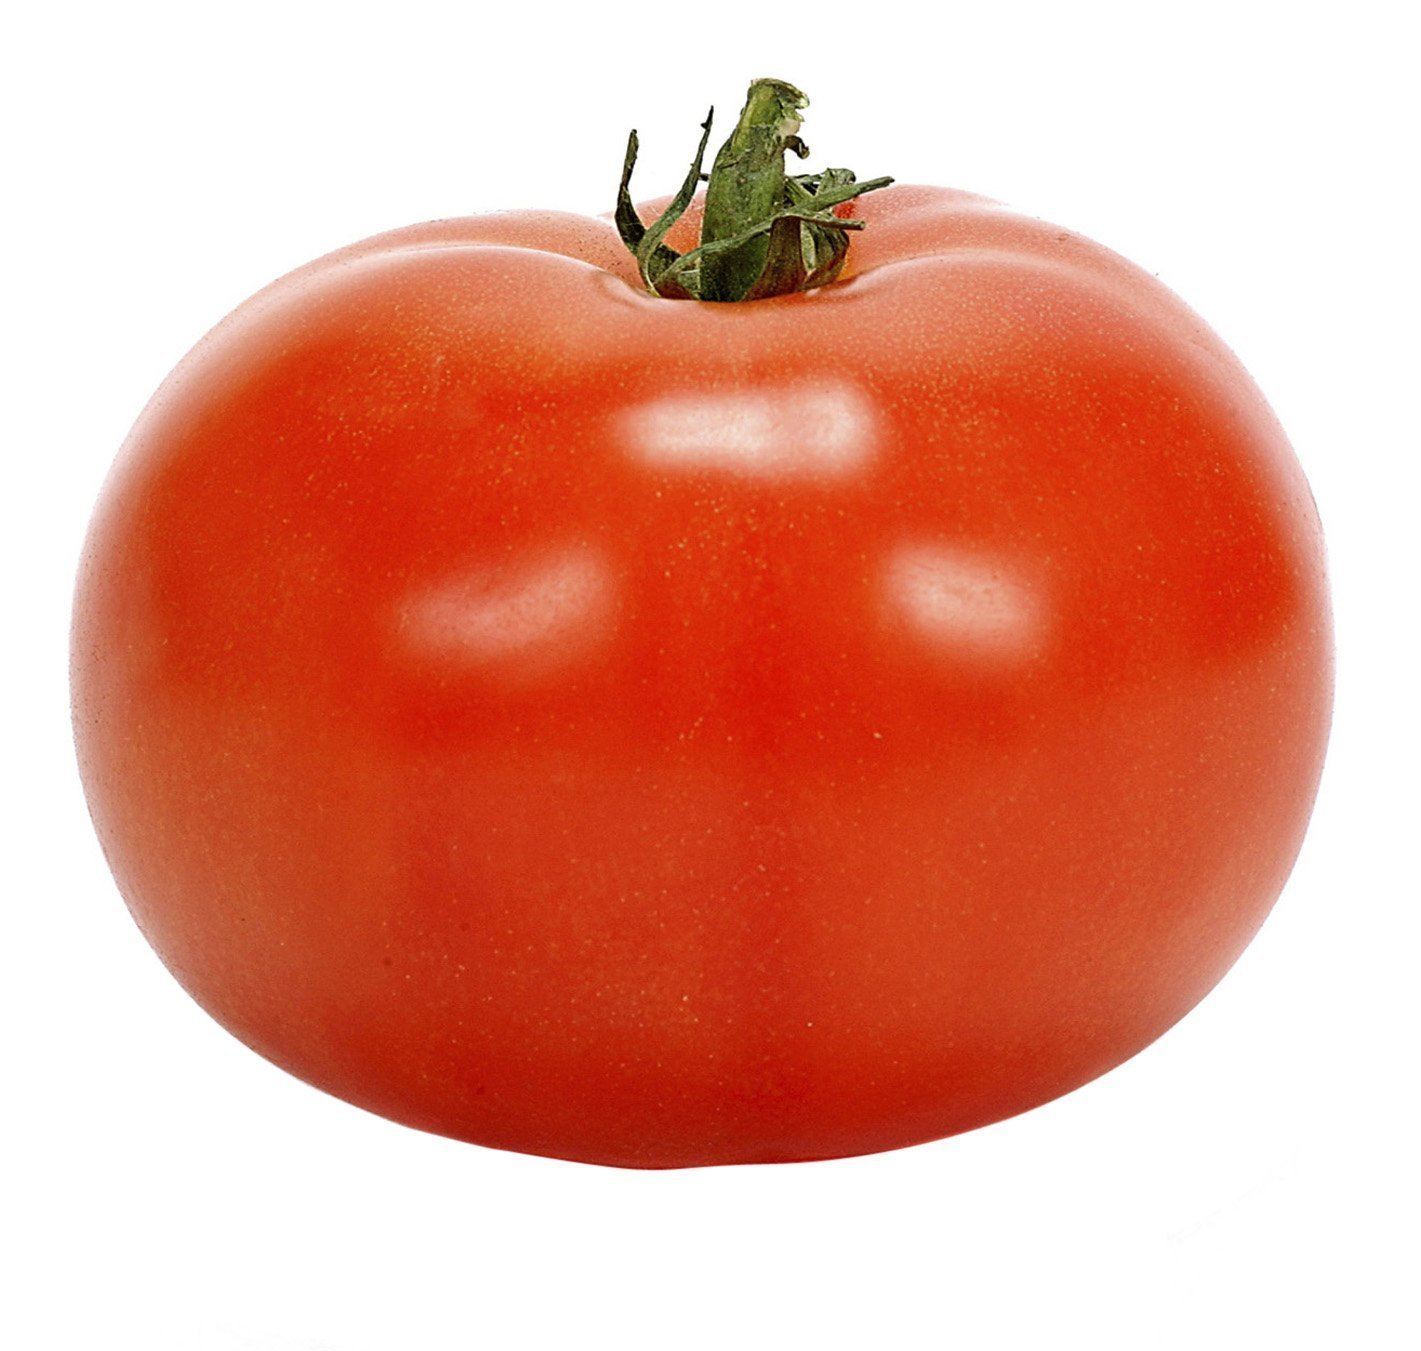

[1]
Banana


In [45]:
# for upload image
from google.colab import files
from google.colab.patches import cv2_imshow
import cv2

uploaded = files.upload()


print(uploaded.keys())
print("ภาพที่อัพโหลดขึ้นมาคือ", list(uploaded)[0])
upload_img = list(uploaded)[0]
image = cv2.imread(upload_img)
# print(image)
cv2_imshow(image)

# ---------------------------------
output, pred = pred_func(image)
if output == 0:
  print("Apple")
elif output == 1:
  print("Banana")
elif output == 2:
  print("Tomato")
else:
  pass

## Deploy Model

- ทำการ save model เป็นไฟล์ โมเดล .h5 

In [34]:
model.save('abtmodel', save_format='h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
